In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

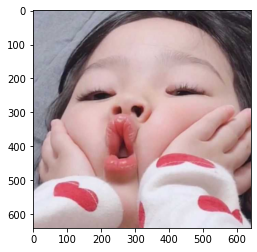

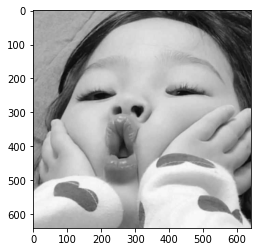

(640, 640, 3)


In [2]:
# cv2.IMREAD_COLOR：彩色图，默认值(1)
# cv2.IMREAD_GRAYSCALE：灰度图(0)
# cv2.IMREAD_UNCHANGED：包含透明通道的彩色图(-1)
img = cv2.imread('image.jpg', cv2.IMREAD_COLOR)
# bgr 图片转换为 rgb
plt.imshow(img[:,:,[2,1,0]])
plt.show()
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, 'gray')
plt.show()
# 由于图片没有透明通道所以任然是3通道
img = cv2.imread('image.jpg', cv2.IMREAD_UNCHANGED)
print(img.shape)
cv2.imshow('im', img)

k = cv2.waitKey(0)
if k == ord('q'):
    cv2.destroyAllWindows()

In [2]:
# 0 是你摄像头的编号 第二个摄像头的编号为2
capture = cv2.VideoCapture(0)
while True:
    # 获取一帧
    # 第1个参数ret(return value缩写)是一个布尔值，表示当前这一帧是否获取正确
    ret, frame = capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) == ord('q'):
        break

In [3]:
# 播放本地视频
capture = cv2.VideoCapture('demo_video.mp4')
while capture.isOpened():
    ret, frame = capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', gray)
    if cv2.waitKey(30) == ord('q'):
        break

In [2]:
# 录制视频
capture = cv2.VideoCapture(0)
# 定义编码方式并创建VideoWriter对象
fource = cv2.VideoWriter_fourcc(*'MJPG')
# 输出的文件名，如'output.avi'
# 编码方式FourCC码
# 帧率FPS
# 要保存的分辨率大小
outfile = cv2.VideoWriter('output.avi', fource, 25., (640, 480))
while capture.isOpened():
    ret, frame = capture.read()
    if ret:
        outfile.write(frame)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) == ord('q'):
            break
    else:
        break

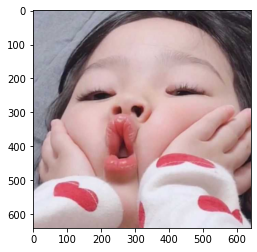

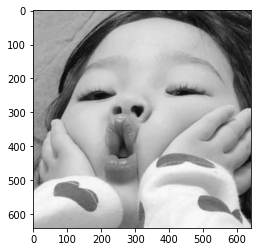

In [2]:
img = cv2.imread('image.jpg')
# 转换为灰度图
# gray=R*0.299+G*0.587+B*0.114 灰度的计算公式
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img[:,:,[2,1,0]])
plt.show()
plt.imshow(img_gray, 'gray')
plt.show()

In [5]:
# 所有的转换模式
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

In [5]:
capture = cv2.VideoCapture(0)
# 蓝色的范围，不同光照条件下不一样，可灵活调整
lower_blue = np.array([100, 110, 110])
upper_blue = np.array([130, 255, 255])
while True:
    # 1.捕获视频中的一帧
    ret, frame = capture.read()
    
    # 2.从BGR转换到HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # 3.inRange()：介于lower/upper之间的为白色，其余黑色
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    # 4.只保留原图中的蓝色部分
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    
    if cv2.waitKey(1) == ord('q'):
        break

In [3]:
# 蓝色的HSV值的上下限lower和upper范围
blue = np.uint8([[[255, 0, 0]]])
hsv_blue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
print(hsv_blue)

[[[120 255 255]]]
